In [1]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


In [5]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sms=pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
print(" no of rows",len(sms))

 no of rows 5572


In [8]:
sms.label.value_counts()

,count
label,
ham,4825
spam,747


In [9]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

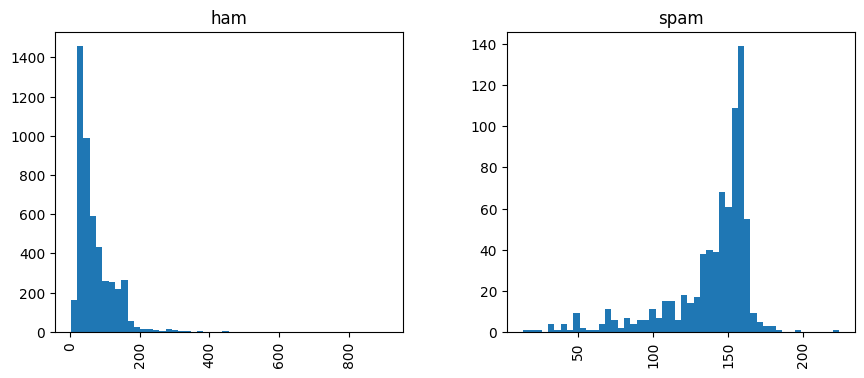

In [10]:
sms.hist(column='length', by='label', bins=50, figsize=(10,4))

In [11]:
sms['spam']= sms['label'].apply(lambda x: 1 if x=='spam' else 0)
sms

,label,text,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sms['text'], sms['spam'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model using various metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Print the evaluation metrics
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

Accuracy: 0.9668
Precision: 1.0000
Recall: 0.7533
F1 Score: 0.8593


In [23]:
new_messages = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.",
                "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]

new_messages_tfidf = vectorizer.transform(new_messages)
predictions = model.predict(new_messages_tfidf)

for message, label in zip(new_messages, predictions):
    print(f'Message: {message} -> {"Spam" if label else "Ham"}')

Message: WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. -> Spam
Message: I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. -> Ham
